<font face="Comic Sans MS" color="red" size="5" ><b>Submitted by Amina Nawaz</b></font>


<font face="Bookman Old Style" color="Blue" size="4">**I start with importing all libraries for my tasks**</font>

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle   
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sudhanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<font face="bookman old style" color="red" size="3"><b>I load the data to my VS code's jupyter notebook enviroment (My data was originally extracted from amazon's server and stored locally on the SSD as a TSV file, i.e. tab-separated values)</b></font>


In [8]:
data = pd.read_csv(r'C:\Users\Sudhanshu\Downloads\amazon_alexa.tsv', delimiter = '\t', quoting = 3)
# I used windows OS, so Path names on Windows tend to have backslashes in them. But we want them to mean actual backslashes, not special characters.
# r after opening brackets stands for "raw" and will cause backslashes in the string to be interpreted as actual backslashes rather than special characters.
data.shape # We check the shape of the data. Output will show rows, columns.

(3150, 5)

<font face="bookman old style" color="blue" size="4"><b>I take a look at the first 5 rows of the data.</b></font>

In [9]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


<font face="bookman old style" color="red" size="4"><b>Then I check the number of missing values</b></font>


In [10]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

<font face="Bookman Old Style" color="blue" size="3"><b>I now look at the exact row with missing value in 'verified_reviews' column. (This column contains the string i.e. actual review of the product submitted by the customer)</b></font>

In [11]:
data[data['verified_reviews'].isna() == True] 

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


<font face="Bookman Old Style" color="red" size="3"><b> I came to know that the 473rd observation had the null observation, hence I choose to drop it, in order to prevent error while training the model.</b></font>

In [12]:
data.dropna(inplace=True)

<font face="bookman old style" color="blue" size="3"><b>I check the number of nulls again to be sure if it's really gone and there are no more nulls in the dataframe.</b></font>

In [13]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

<font face="Bookman Old Style" color="blue" size="3"><b>I create a new variable column called 'length' that contains the length of strings in the 'verified reviews' column. (i.e. the length of the submmited review by the customers). 
Then, check the head of the data to see if the new column is created.</b></font>

In [15]:
data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<font face="Bookman Old Style" color="red" size="3"><b>I look at my datatypes; I have 3 numeric and 3 string columns.</b></font>


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   length            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.2+ KB


<font face="Bookman Old Style" color="blue" size="3"><b>I have checked the frequency of occurrences for ratings provided by customers, which range from 1 to 5 based on their experiences.</b></font>

In [17]:
data["rating"].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

<font face="Bookman old style" color="red" size="3"><b>We create a bar plot to visualize the distribution of rating magnitude by customers.</b></font>

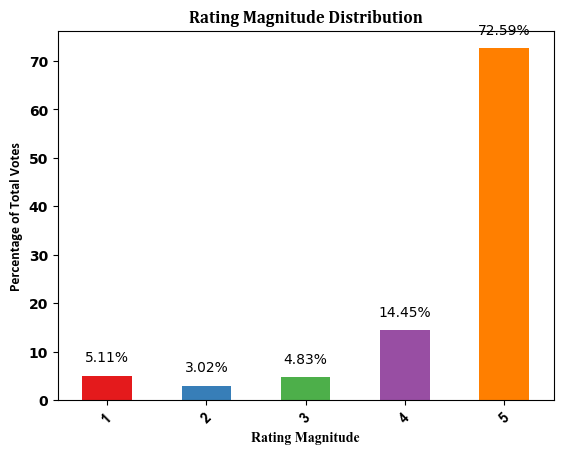

In [39]:
# Calculate the percentage of each rating magnitude upfront
total_votes = data['rating'].count()
percentage_votes = (data['rating'].value_counts() / total_votes * 100).sort_index()

# Plot the bar chart using the counts but color-coded as before
ax = percentage_votes.plot.bar(color=[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745), 
                                      (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), 
                                      (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), 
                                      (0.596078431372549, 0.3058823529411765, 0.6392156862745098), 
                                      (1.0, 0.4980392156862745, 0.0)])

# Add the percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', xytext=(0, 10), textcoords='offset points')

plt.title('Rating Magnitude Distribution', fontname="cambria", fontweight="bold")
plt.xlabel('Rating Magnitude', fontname="Times New Roman", fontweight="bold")
plt.ylabel('Percentage of Total Votes', fontname="Calibri", fontweight="bold")
plt.style.use('ggplot')
plt.xticks(rotation=45, fontname="Arial", fontweight="bold")
plt.yticks(fontweight="bold")
plt.show()


<font face="Bookman Old Style" color="Purple" size="4"><b>From the graph, we observe that approximately 75% of the customers have given a rating of 5.</b></font>

<font face="bookman old style" color="red" size="3"><b>Now I plot an exploded pie chart to illustrate the distribution of rating magnitude by customers.</b></font>

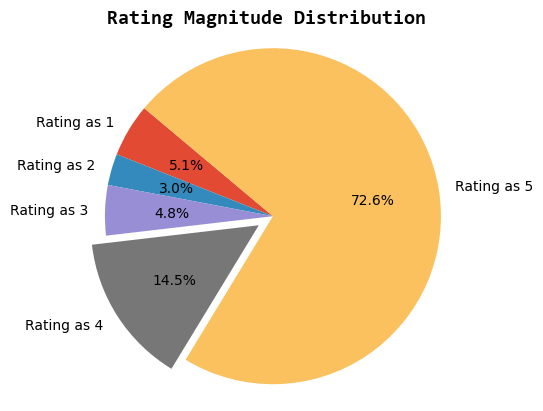

In [75]:
# Declaring the data for the pie chart
sectors = ['Rating as 1', 'Rating as 2', 'Rating as 3', 'Rating as 4', 'Rating as 5'] # Name of the rating magnitudes used as labels of each sector in pie.
sizes = [5.11, 3.02, 4.83, 14.45, 72.59]  # percentages for each rating magnitude

# Explode values for each slice (0 for no explosion, 0.1 for slight separation)
explosion= (0, 0, 0, 0.1, 0)  

# Plotting the pie chart
plt.pie(sizes, explode=explosion, labels=sectors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Rating Magnitude Distribution', fontname='Consolas', fontweight="bold")
plt.show()

<font face="Bookman old style" color="blue" size="3"><b>I will check the frequency of positive and negative feedbacks in my dataset. The 'feedback' column contains binary variables indicating whether the customer has submitted a negative (0) or a positive (1) feedback.</b></font>

In [18]:
data['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

<font face="Bookman Old Style" color="red" size="3">**We plot the negative feedback and positive feedback by customers to understand better.**</font>

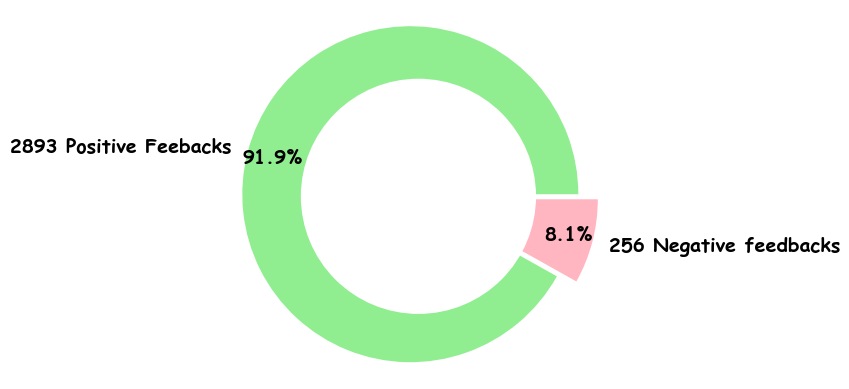

In [31]:
import matplotlib.pyplot as plt

# Assuming 'sizes' and 'labels' are defined from your feedback counts
sizes = [2893, 256]  
labels = ['2893 Positive Feebacks', '256 Negative feedbacks']
colors = ['#90EE90', '#FFB6C1']  # light green and light pink
explode = (0.05, 0.07)  # Slightly explode/space out the slices

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode, textprops={'fontsize': 14, 'weight': 'bold', 'color': 'black', 'fontname':'Comic Sans MS'})

# Draw center circle for donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()  # Get current figure
fig.gca().add_artist(centre_circle)  # Get current axes and add the circle

# Adjust and show plot
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

<font face="Bookman Old Style" color="blue" size="3"><b>I check which ratings (between 1 to 5) were positive and which ratings are negative.</b></font>

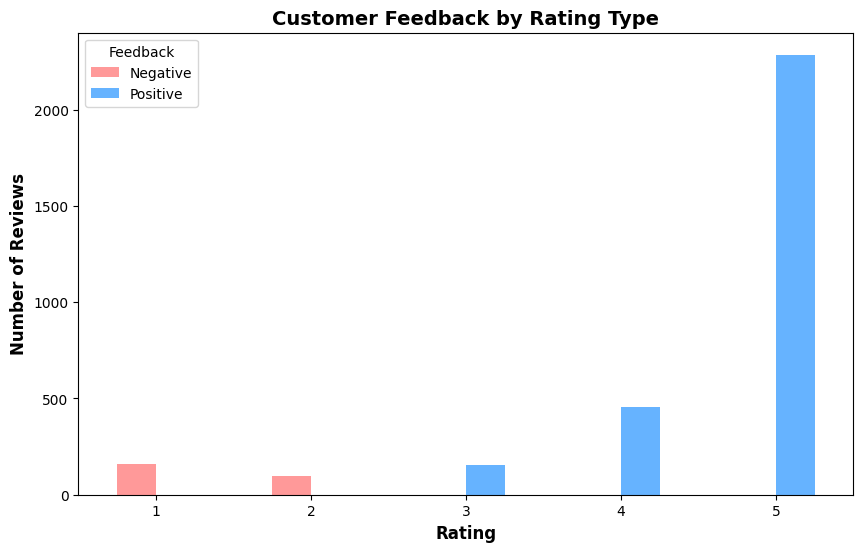

In [21]:
# Group the data by 'rating' and 'feedback' and count the occurrences

grouped_data = data.groupby(['rating', 'feedback']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax, color=['#ff9999', '#66b3ff'])

# Customization
ax.set_title('Customer Feedback by Rating Type', fontsize=14, fontweight="bold")
ax.set_xlabel('Rating', fontsize=12, fontweight="bold")
ax.set_ylabel('Number of Reviews', fontweight='bold', fontsize=12)
ax.legend(['Negative', 'Positive'], title='Feedback')


plt.xticks(rotation=0)
plt.show()


<font face="Bookman Old Style" color="red" size="3"><b>From the bar plot, I deduce that the positive feedbacks were submitted by people who gave a rating of 3 and above.</b></font>

<font face="Bookman Old Style" color="blue" size="3"><b>Now I analyze the 'variation' column, this column contains the type of product that the customer has submitted feedback or rating about.</b></font>

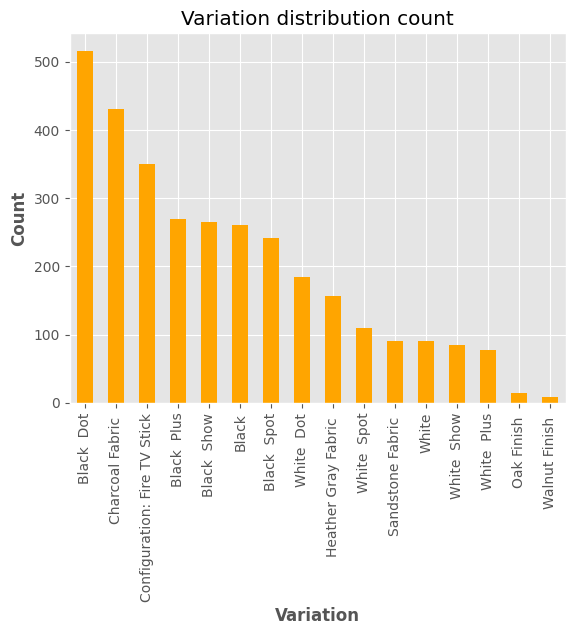

In [104]:
data['variation'].value_counts().plot.bar(color = 'orange')  # A Bar graph to visualize the total counts of each variation 
                                                             #(variation here means the type of product that the customer has submitted feedback or rating about)
plt.title('Variation distribution count')
plt.xlabel('Variation', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.show()

<font face="Bookman Old Style" color="red" size="3"><b>Finding the percentage distribution of each variation - we'll divide the number of records for each variation by the total number of records.</b></font>

In [50]:
round(data['variation'].value_counts()/data.shape[0]*100,2) # We round the percentage distribution of each type of product to 2 decimal places.

variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64

<font face="Bookman Old Style" color="blue" size="3"><b>Average rating for each product is listed as below</b></font>

In [55]:
round(data.groupby('variation')['rating'].mean(),2) # Means based on type of products (rounded to 2 decimal places)

variation
Black                           4.23
Black  Dot                      4.45
Black  Plus                     4.37
Black  Show                     4.49
Black  Spot                     4.31
Charcoal Fabric                 4.73
Configuration: Fire TV Stick    4.59
Heather Gray Fabric             4.69
Oak Finish                      4.86
Sandstone Fabric                4.36
Walnut Finish                   4.89
White                           4.17
White  Dot                      4.42
White  Plus                     4.36
White  Show                     4.28
White  Spot                     4.31
Name: rating, dtype: float64

<font face="Bookman Old Style" color="red" size="3"><b> I plot the mean rating for each product to understand the distribution of average rating for each product.</b></font>

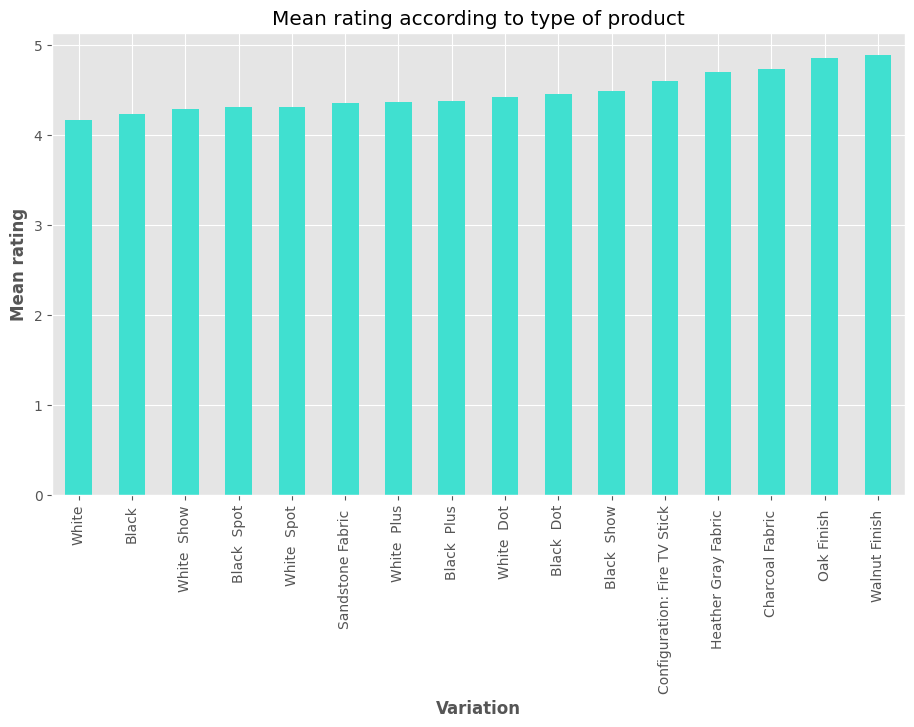

In [59]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'turquoise', figsize=(11, 6))
plt.title("Mean rating according to type of product")
plt.xlabel('Variation', fontweight="bold")
plt.ylabel('Mean rating', fontweight="bold")
plt.show()

<font face="Bookman Old Style" color="blue" size="3"><b>I check the descriptive statistics of the length of each review text submitted by customers, rounded to 2 decimal places.</b></font>

In [105]:
round(data['length'].describe(),2)

count    3149.00
mean      132.71
std       182.54
min         1.00
25%        30.00
50%        74.00
75%       166.00
max      2853.00
Name: length, dtype: float64

<font face="Bookman Old Style" color="red" size="3"><b>I plot a histogram with kernel density estimate to show the distribution of the text length of all reviews.</b></font>

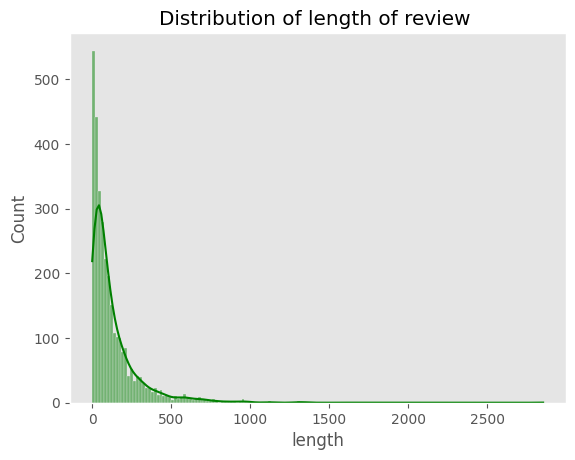

In [67]:
sns.histplot(data['length'],color='green',kde=True).set(title='Distribution of length of review ')
plt.grid(False)
plt.show()

<font face="Bookman Old Style" color="blue" size="3"><b>From the overall distribution of review's text lengths, I deduce that most of the reviews are within 500 characters.</b></font>


<font face="Bookman Old Style" color="red" size="3"><b>I go ahead and check the length of customer reviews when feedback was negative.</b></font>

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

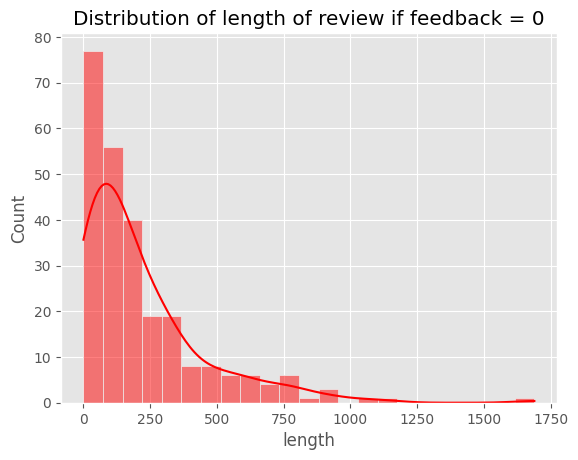

In [69]:
sns.histplot(data[data['feedback']==0]['length'],color='red', kde=True).set(title='Distribution of length of review if feedback = 0')

<font face="Bookman Old Style" color="green" size="3"><b>And also checking the distribution of length of reviews when feedbacks were positive.</b></font>

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

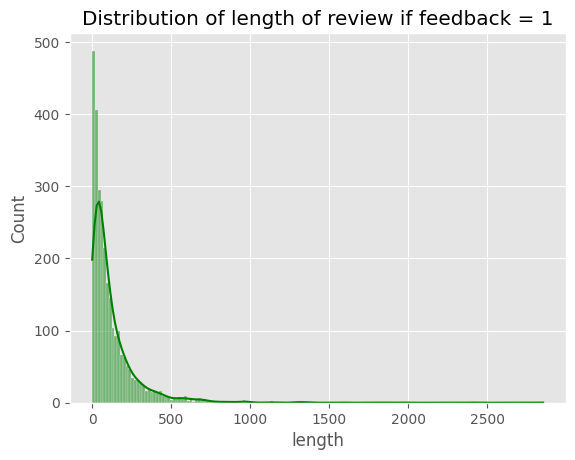

In [70]:
sns.histplot(data[data['feedback']==1]['length'],color='green',kde='True').set(title='Distribution of length of review if feedback = 1')

<font face="Bookman Old Style" color="blue" size="3"><b>Lastly, I check the relation between submitted rating magnitude and its text length (rating-wise review length).</b></font>

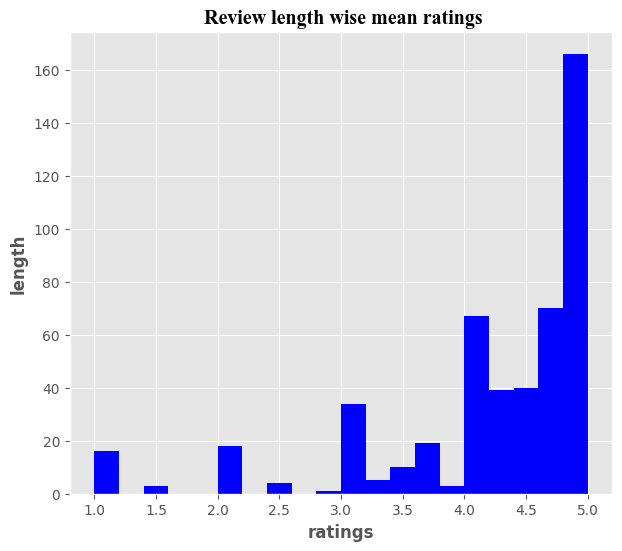

In [80]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings", fontname="Times New Roman", fontweight="bold")
plt.xlabel('ratings', fontweight="bold")
plt.ylabel('length', fontweight="bold")
plt.show()

<font face="Bookman Old Style" color="red" size="3"><b>I performed Word Cloud Visualization of all Reviews</b></font>

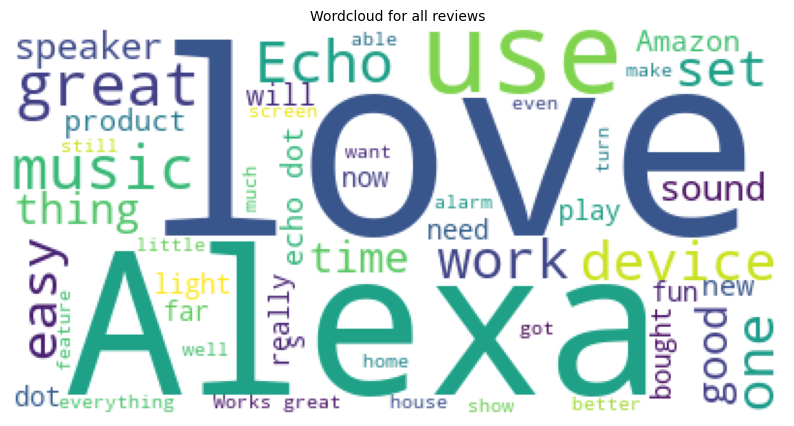

In [81]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

<font face="Bookman Old Style" color="blue" size="3"><b>I implement the extraction of the Unique Words from Positive and Negative Feedbacks</b></font>

In [82]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

<font face="Bookman Old Style" color="red" size="3"><b>I perform Word Cloud Visualization of Unique Words in Negative Reviews</b></font>

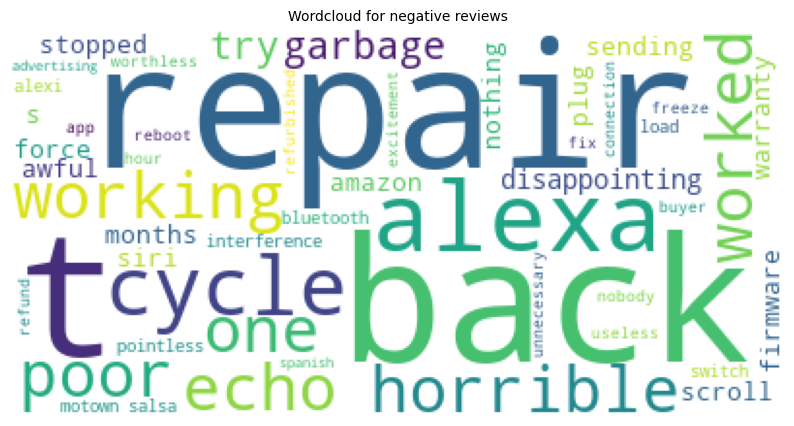

In [83]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

<font face="Bookman Old Style" color="blue" size="3"><b>Identification of Negative Words in the above cloud, reveals that repair, garbage, poor, horrible, disappointing etc. correpond to negative reviews<b></font>

<font face="Bookman Old Style" color="red" size="3"><b>Now, I plot wordcloud to see the words for the positive feedback category.</b></font>

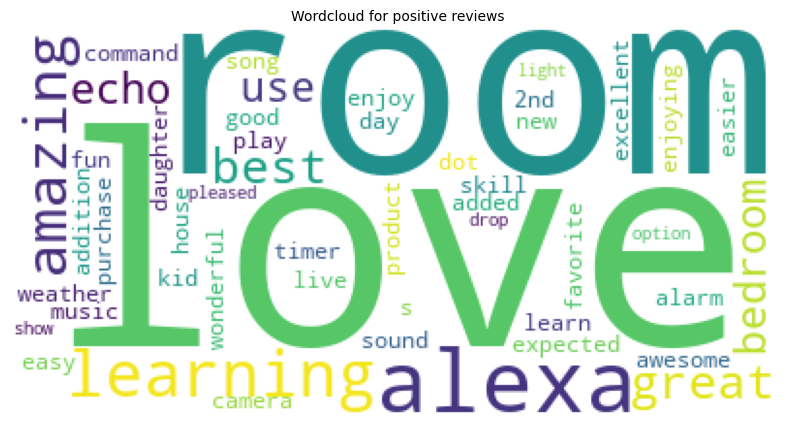

In [84]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

<font face="Bookman Old Style" color="blue" size="3"><b>Positive words can be seen in the above word cloud: good, enjoying, amazing, best, great, etc.</b></font>

<font face="Bookman Old Style" color="red" size="3"><b>Preprocessing and Modeling</b></font>

To build the corpus from the 'verified_reviews', I perform the following steps:

- Replace any non-alphabet characters with a space.
- Convert to lower case and split into words.
- Iterate over the individual words, and if it is not a stopword, then add the stemmed form of the word to the corpus.

In [85]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

<font face="Bookman Old Style" color="blue" size="3"><b>Using Count Vectorizer to Create Bag of Words</b></font>

In [86]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

<font face="Bookman Old Style" color="red" size="3"><b>Checking the Shape of X and y</b></font>

In [88]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


<font face="Bookman Old Style" color="blue" size="3"><b>Splitting Data into Train and Test Sets with 30% for Testing & 70 for training</b></font>

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


<font face="Bookman Old Style" color="red" size="3"><b>Printing Maximum Values of Features in Train and Test Sets</b></font>

In [90]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


<font face="Bookman Old Style" color="blue" size="3"><b>I will Scale X_train and X_test to Ensure Values Are Between 0 and 1</b></font>


In [91]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

<font face="Bookman Old Style" color="red" size="3"><b>Fitting Scaled X_train and y_train on Random Forest Classifier</b></font>

In [93]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

<font face="Bookman Old Style" color="blue" size="3"><b>Accuracy of the Model on Training and Testing Data</b></font>

In [94]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9470899470899471


<font face="Bookman Old Style" color="red" size="3"><b>Predicting on the Test Set</b></font>

In [95]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

<font face="Bookman Old Style" color="blue" size="3"><b>Generating the Confusion Matrix and displaying as array</b></font>

In [107]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[ 32,  46],
       [  4, 863]], dtype=int64)

<font face="Bookman Old Style" color="red" size="3"><b>Displaying the Confusion Matrix</b></font>

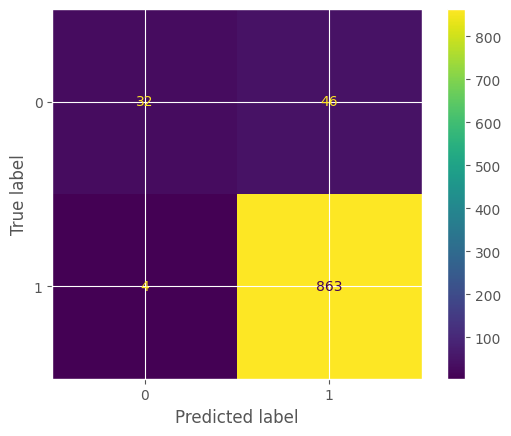

In [97]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

<font face="Bookman Old Style" color="blue" size="3"><b>Summary of what I did in my Project:</b></font>

1. **Data Exploration and Cleaning**:
   - The dataset contains 3,150 entries with 5 columns: rating, date, variation, verified_reviews, and feedback.
   - Initial inspection revealed some missing values in the 'verified_reviews' column, which were subsequently dropped.
   - Data types and basic statistics were checked to ensure data integrity.

2. **Exploratory Data Analysis (EDA)**:
   - The distribution of ratings and feedbacks was analyzed.
   - The most common product variations were identified.
   - Descriptive statistics of review lengths were computed.

3. **Text Preprocessing**:
   - Textual data was preprocessed to remove non-alphabet characters, convert to lowercase, and split into words.
   - Stopwords were removed, and words were stemmed to build the corpus.

4. **Feature Engineering**:
   - Count Vectorizer was used to convert text data into a bag of words representation.

5. **Model Building**:
   - The dataset was split into training and testing sets (70% for training, 30% for testing).
   - The Random Forest Classifier was trained on the scaled training data.
   - Model accuracy was evaluated on both training and testing sets, achieving high accuracy scores.

6. **Evaluation**:
   - Confusion matrix and accuracy scores were computed to evaluate model performance.
   - Visualizations such as word clouds and histograms were utilized to gain insights into the data.

7. **Conclusion**:
   - The project successfully demonstrated the application of NLP techniques for sentiment analysis of customer reviews.
   - The trained model showed high accuracy in predicting positive and negative feedbacks based on review text.
   - Semantic analysis provided valuable insights into customer sentiments, which can be utilized for business decision-making processes.

</font>
